## testing functionalized pipeline

In [1]:
import numpy as np
import yaml, os
from sys import path
from pathlib import Path
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from starships.instruments import load_instrum

path.append("opereira/starships/cc_scripts/")

import cc_scripts.reduction as red
import cc_scripts.make_model as mod
import cc_scripts.correlations as corr

from starships.correlation import quick_correl
from starships.correlation_class import Correlations

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

INFO:starships.planet_obs:Getting WASP-127 b from ExoFile
INFO:starships.planet_obs:Fetching the uncorrected spectra
INFO:starships.planet_obs:File: list_e2ds


Changing M_star from [2.14748266e+30] kg to 1.8889893771631484e+30 kg
It became [1.88898938e+30] kg
Changing R_star from [9.67023e+08] m to 927368100.0 m
It became [9.273681e+08] m
Changing M_pl from [3.12621121e+26] kg to 3.131905585604484e+26 kg
It became [3.13190559e+26] kg
Changing R_pl from [93726012.] m to 93726012.0 m
It became [93726012.] m
Changing RV_sys from [0.] km / s to -8.86 km / s
It became [-8.86] km / s
Changing mid_tr from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing t_peri from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing trandur from [15670.368] s to 4.3529 h
It became [15670.44] s
Changing period from [360984.827232] s to 4.1780625 d
It became [360984.6] s
Changing excent from 0.0 to 0.0
It became 0.0
Changing incl from [1.5393804] rad to 87.84 deg
It became [1.53309721] rad
Changing Teff from [5620.] K to 5842
It became [5842.] K
Changing Tp from [1400.] K to 1400.0 K
It became [1400.] K
Changing

INFO:starships.planet_obs:Fetching data
INFO:starships.planet_obs:File: list_tellu_corrected
INFO:starships.planet_obs:Fetching the tellurics
INFO:starships.planet_obs:File: list_tellu_recon
INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']
/home/opereira/.venvs/starships-env/lib/python3.11/site-packages/petitRADTRANS/radtrans.py:100: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'H', 'O', 'W', 'a', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'period', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'v', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 25, 27, 41, 43, 50, 58, 66, 68, 72, 74, 75, 76, 79, 80, 81, 82, 86, 87, 88, 89, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'H',

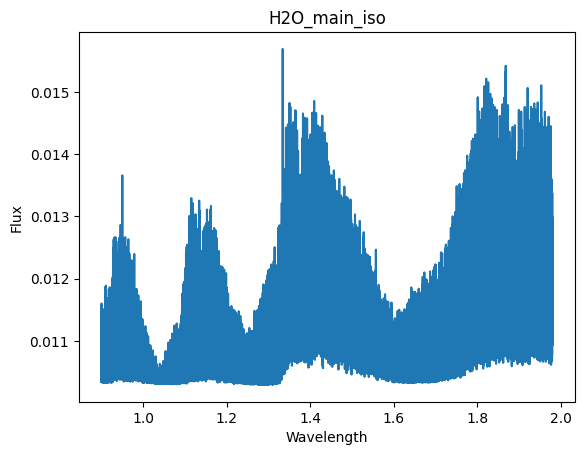

In [5]:
import cc_scripts.run_pipe as run
from importlib import reload

reload(run)
reload(red)
reload(mod)
reload(corr)

config_filepath = 'config.yaml'
model_filepath = 'model_config.yaml'

with open(config_filepath, 'r') as file:
    config_dict = yaml.safe_load(file)

# unpack the model input parameters
with open(model_filepath, 'r') as file:
    config_model = yaml.safe_load(file)

config_dict['obs_dir'] = Path.home() / Path(config_dict['obs_dir'])

# creating the planet and observation objects
planet, obs = red.load_planet(config_dict)

out_dir, path_fig = red.set_save_location(planet.name, config_dict['reduction'], config_dict['instrument'])

# making the model
wave_mod, mod_spec = run.make_model(config_dict, config_model, planet, out_dir, path_fig)

# # performing the reduction for each n_pc, mask_tellu, mask_wings and the corrlations
# for n_pc in config_dict['n_pc']:
#     for mask_tellu in config_dict['mask_tellu']:
#         for mask_wings in config_dict['mask_wings']:

#             # reducing the data
#             transit = run.reduce_data(config_dict, n_pc, mask_tellu, mask_wings, planet, obs, out_dir, path_fig)

#             # performing correlations
#             ccf_obj, logl_obj = run.perform_correlations(config_dict, transit['1'], wave_mod, mod_spec, obs, path_fig)
            
#             # ttest map
#             ccf_obj.ttest_map(transit['1'], kind='logl', vrp=np.zeros_like(obs.vrp), orders=np.arange(75), 
#                   kp0=0, RV_limit=config_dict['RV_lim'], kp_step=config_dict['Kp_step'], 
#                   rv_step=config_dict['RV_step'], RV=None, speed_limit=3, icorr=obs.iIn, path_fig = str(path_fig))